In [1]:
import sys
sys.path.append('..')
import numpy as np
from dezero import Variable

In [2]:
def f(x):
    return x ** 4 - 2 * x ** 2

In [3]:
x = Variable(np.array(2.0))
y = f(x)
y.backward(create_graph=True)
print(x.grad)

variable(24.0)


In [4]:
gx = x.grad
gx.backward()
print(x.grad)

variable(68.0)


In [5]:
x = Variable(np.array(2.0))
y = f(x)
y.backward(create_graph=True)
print(x.grad)
gx = x.grad
x.cleargrad()
gx.backward()
print(x.grad)

variable(24.0)
variable(44.0)


In [6]:
x = Variable(np.array(2.0))

import copy
xs, ys = [], []

for i in range(10):
    print(i, x)
    
    y = f(x)
    x.cleargrad()
    y.backward(create_graph=True)
    
    xs.append(copy.deepcopy(x.grad.data))
    ys.append(copy.deepcopy(y.data))
    
    gx = x.grad
    x.cleargrad()
    gx.backward()
    gx2 = x.grad
    
    x.data -= gx.data / gx2.data

0 variable(2.0)
1 variable(1.4545454545454546)
2 variable(1.1510467893775467)
3 variable(1.0253259289766978)
4 variable(1.0009084519430513)
5 variable(1.0000012353089454)
6 variable(1.000000000002289)
7 variable(1.0)
8 variable(1.0)
9 variable(1.0)


[array(24.), array(6.49135988), array(1.49594052), array(0.21036924), array(0.00727752), array(9.88248987e-06), array(1.83124627e-11), array(0.), array(0.), array(0.)]
[array(8.), array(0.24479202), array(-0.89443433), array(-0.997369), array(-0.9999967), array(-1.), array(-1.), array(-1.), array(-1.), array(-1.)]


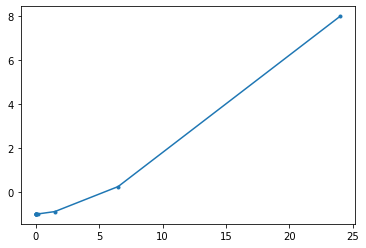

In [7]:
import matplotlib.pyplot as plt

print(xs)
print(ys)

plt.plot(xs, ys, marker='.')
plt.show()